In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import warnings
warnings.filterwarnings('ignore')


In [10]:
def Data_Preprocessing(data):
    return data.dropna(), [0.1*x for x in range(len(data.dropna()))]

def SMA (x,y,n):
    y_sma=y.rolling(window=n).mean()
    ax=plt.figure(figsize=(25,8)).gca()
    ax.tick_params(labelsize=20)
    plt.plot(x,y,label='Исходные данные',lw=1,color='grey')
    plt.plot(x,y_sma,label='Простое скользящее среднее, сглаживающий интервал '+ str(n)+' точек',lw=2)
    plt.legend(fontsize=22)
    plt.ylabel('Объем (л)',size=20)
    plt.xlabel('Время (с)',size=20)
    plt.grid()
    return y_sma

def LOOPA (y_new,a):
    dy=[(y[x+1]-y[x])/0.1 for x in range(len(y)-1)]
    dy_new=[(y_new[x+1]-y_new[x])/0.1 for x in range(len(y_new)-1)]
    ax=plt.figure(figsize=(25,15)).gca()
    ax.tick_params(labelsize=20)
    plt.plot(y[1:],dy,label='Исходные данные',lw=1,color='grey')
    plt.plot(y_new[1:],dy_new,label=a,lw=3)
    plt.legend(fontsize=22)
    plt.ylabel('Поток (л\сек)',size=20)
    plt.xlabel('Объем (л)',size=20)
    plt.grid()


def polynom(y, x, n):
    y_=np.array(y)
    x_=np.array(x)
    p=np.poly1d(np.polyfit( x_,y_, n))
    xp = np.linspace(min(x_),max(x_), n)    
    ax=plt.figure(figsize=(25,8)).gca()
    ax.tick_params(labelsize=20)
    plt.plot(x_,y_,label='Исходные данные',lw=1,color='grey')
    plt.plot(xp,p(xp),label='Полиномиальная интерполяция '+ str(n)+' степени',lw=2)
    plt.legend(fontsize=22)
    plt.ylabel('Объем (л)',size=20)
    plt.xlabel('Время (с)',size=20)
    plt.grid()
    return p(xp)

def plot_requency_power(y,m):   
    sig_fft = fftpack.fft(y)
    power = np.abs(sig_fft)[1:]
    sample_freq = fftpack.fftfreq(y.size, d=0.1)[1:]    
    ax=plt.figure(figsize=(10,6)).gca()
    plt.stem(sample_freq, power)
    plt.title(m)
    plt.xlabel('Частота (Гц)',size=20)
    plt.ylabel('Спектральная плотность мощности',size=20)
    plt.grid()
    ax.tick_params(labelsize=20)
    
    

def requency_power(y):
    peak_freq=[]
    sig_fft = fftpack.fft(y.dropna())
    power = np.abs(sig_fft)[1:]
    sample_freq = fftpack.fftfreq(y.dropna().size, d=0.1)[1:]
    
    ax=plt.figure(figsize=(25,8)).gca()
    plt.stem(sample_freq, power)
    plt.xlabel('Частота (Гц)',size=20)
    plt.ylabel('Спектральная плотность мощности',size=20)
    plt.grid()
    ax.tick_params(labelsize=20)
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    plt.plot(freqs[:8], power[:8],color='red',label='Пиковая частота')    
    plt.legend(fontsize=22)
    for i in range(len(power)-1):
        a= power[i]
        i+=1
        b=power[i]
        if b>a:
            peak_freq.append(sample_freq[i])         
    
    return peak_freq[1]
   

def Furier(y,x,peak_freq):
    high_freq_fft = fftpack.fft(y.dropna())
    sample_freq = fftpack.fftfreq(y.dropna().size, d=0.1)
    high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
    filtered_sig = fftpack.ifft(high_freq_fft)
    ax=plt.figure(figsize=(25,8)).gca()
    ax.tick_params(labelsize=20)
    plt.plot(x,y,label='Исходные данные',lw=1,color='grey')
    plt.plot(x,filtered_sig,label='Фильтр Фурье, '+'частота '+ str(round(peak_freq,2))+' Гц ',lw=2)
    plt.legend(fontsize=22)
    plt.ylabel('Объем (л)',size=20)
    plt.xlabel('Время (с)',size=20)
    plt.grid()
    return filtered_sig

In [3]:
df=pd.read_excel('C:/Users/l.soina/Desktop/курсовая работа/data.xlsx',header=0)

In [4]:
df.head(10)

,p11-3,p13,p13-3
0,60.351,60.761,60.731
1,60.475,60.663,60.775
2,60.320,60.603,61.037
3,60.423,60.638,61.149
4,60.487,60.389,61.287
5,60.662,60.150,61.569
6,60.770,60.176,61.727
7,60.872,60.210,61.788
8,61.104,60.324,61.785
9,61.173,60.495,61.908


In [5]:
df.rename(columns={'p11-3': 'patient_1','p13':'patient_2','p13-3':'patient_3'},inplace=True)

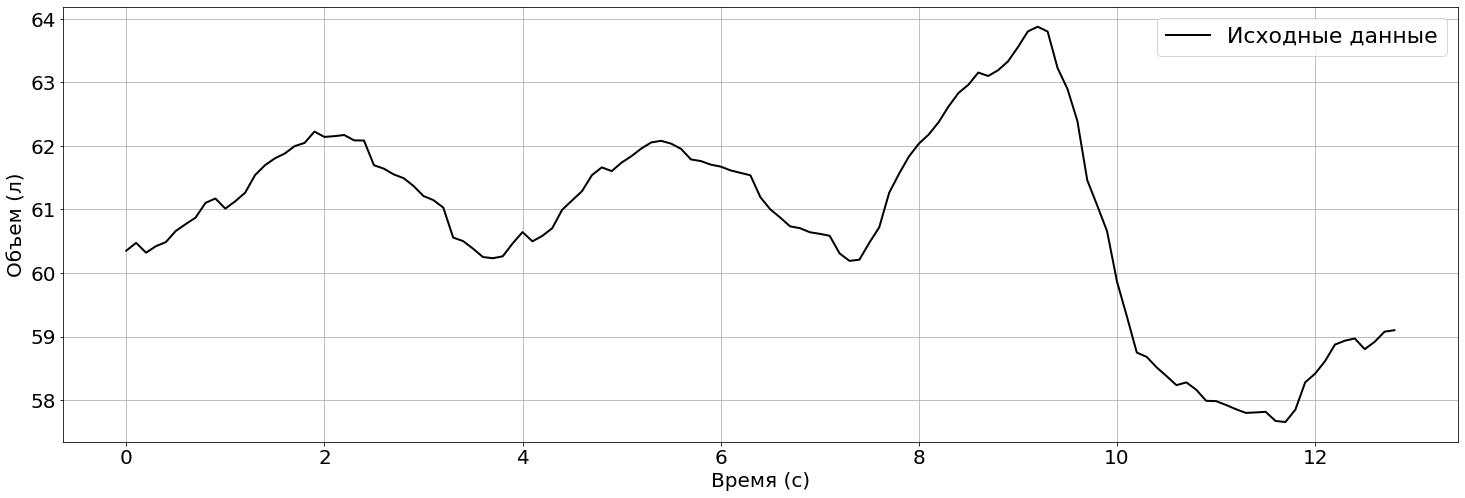

In [6]:
y,x=Data_Preprocessing(df.patient_1)
ax=plt.figure(figsize=(25,8)).gca()
ax.tick_params(labelsize=20)
plt.plot(x,y,label='Исходные данные',lw=2,color='black')
plt.legend(fontsize=22)
plt.ylabel('Объем (л)',size=20)
plt.xlabel('Время (с)',size=20)
plt.grid()

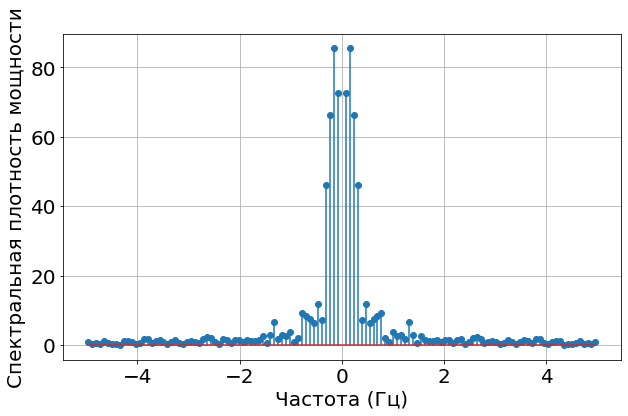

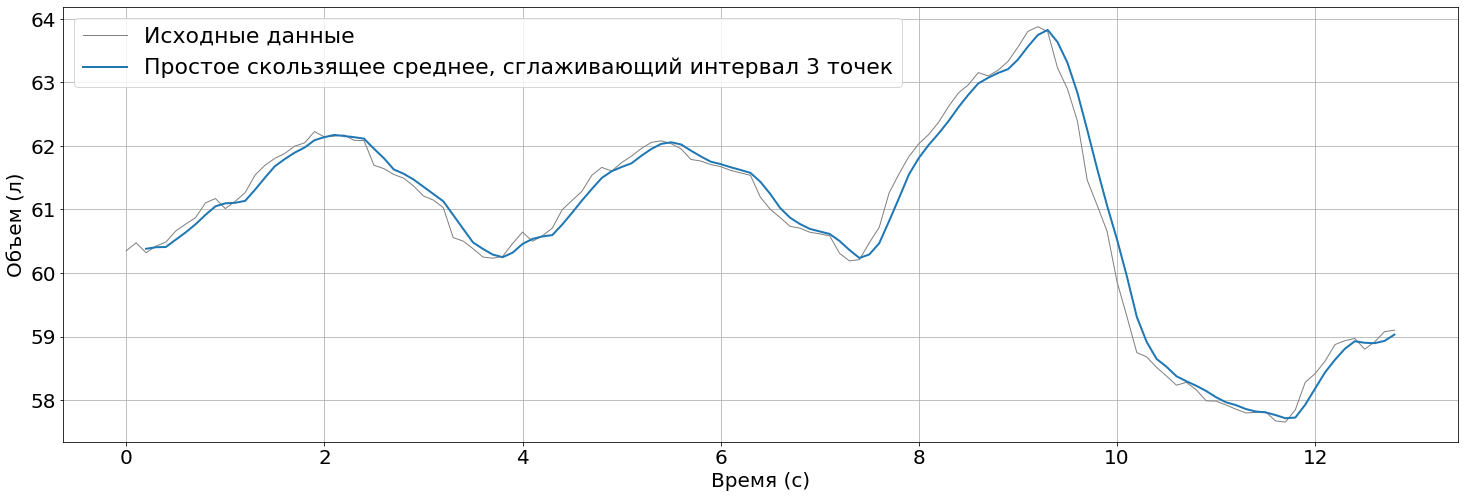

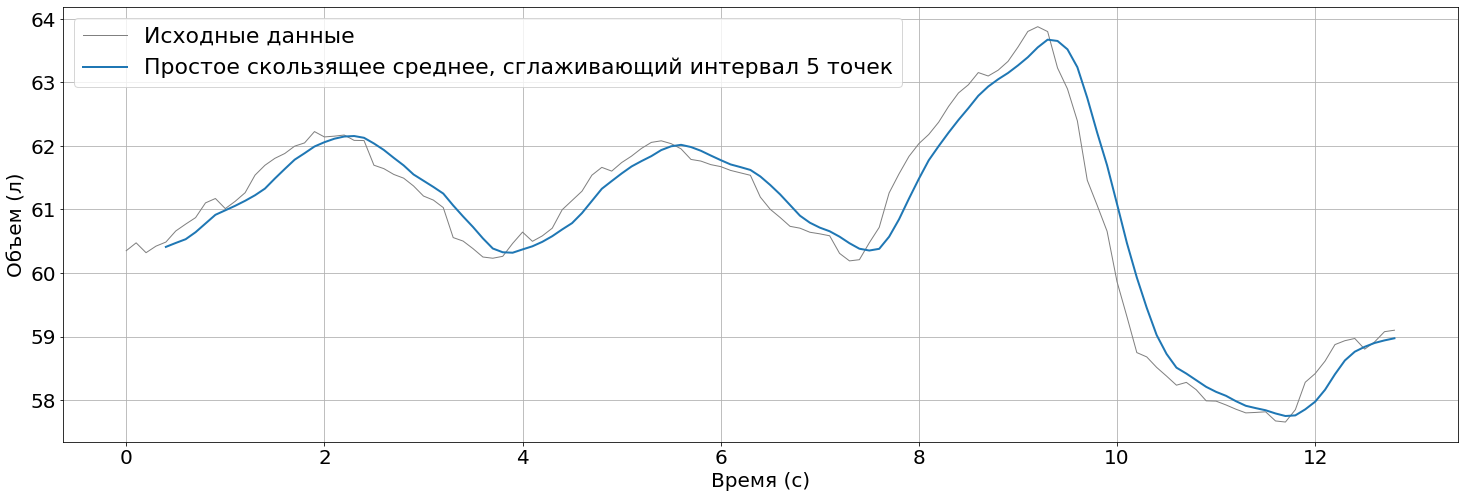

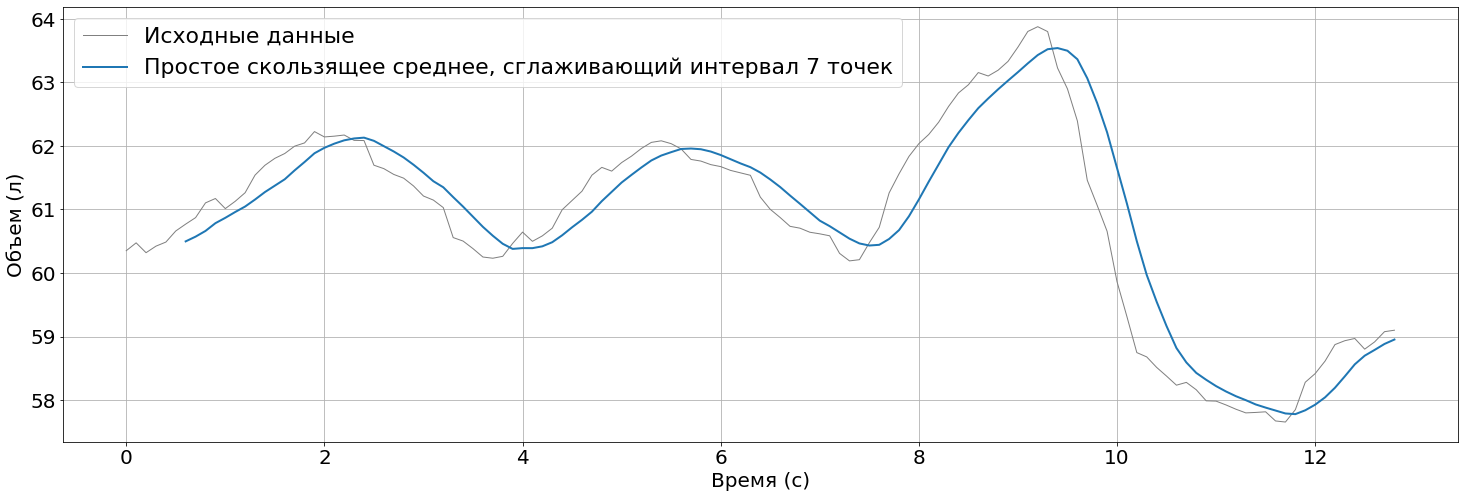

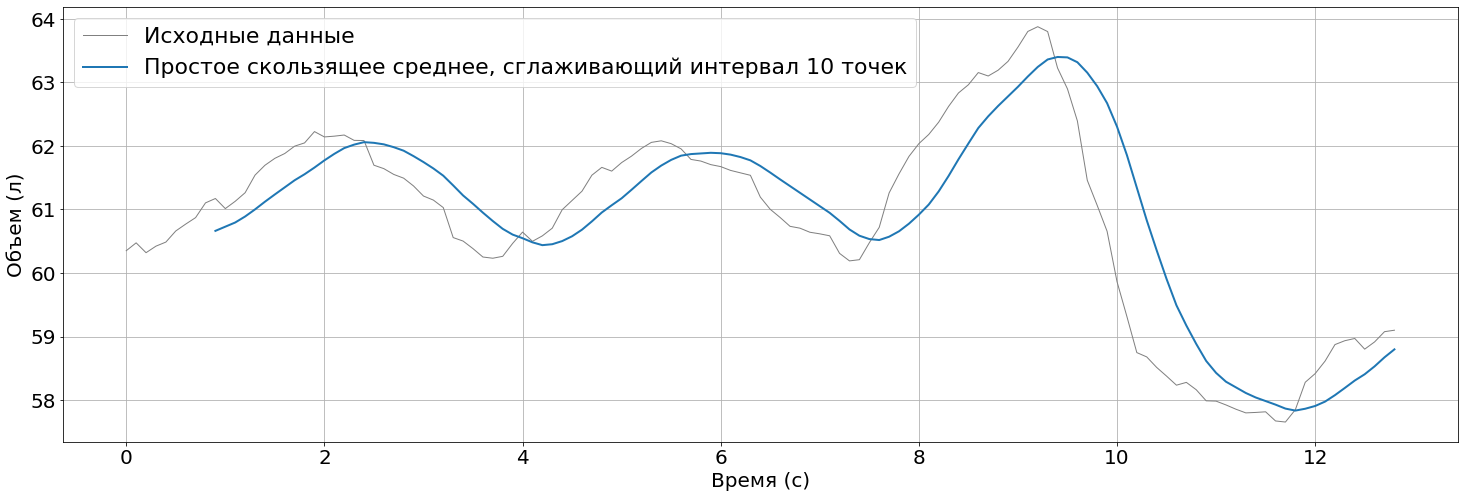

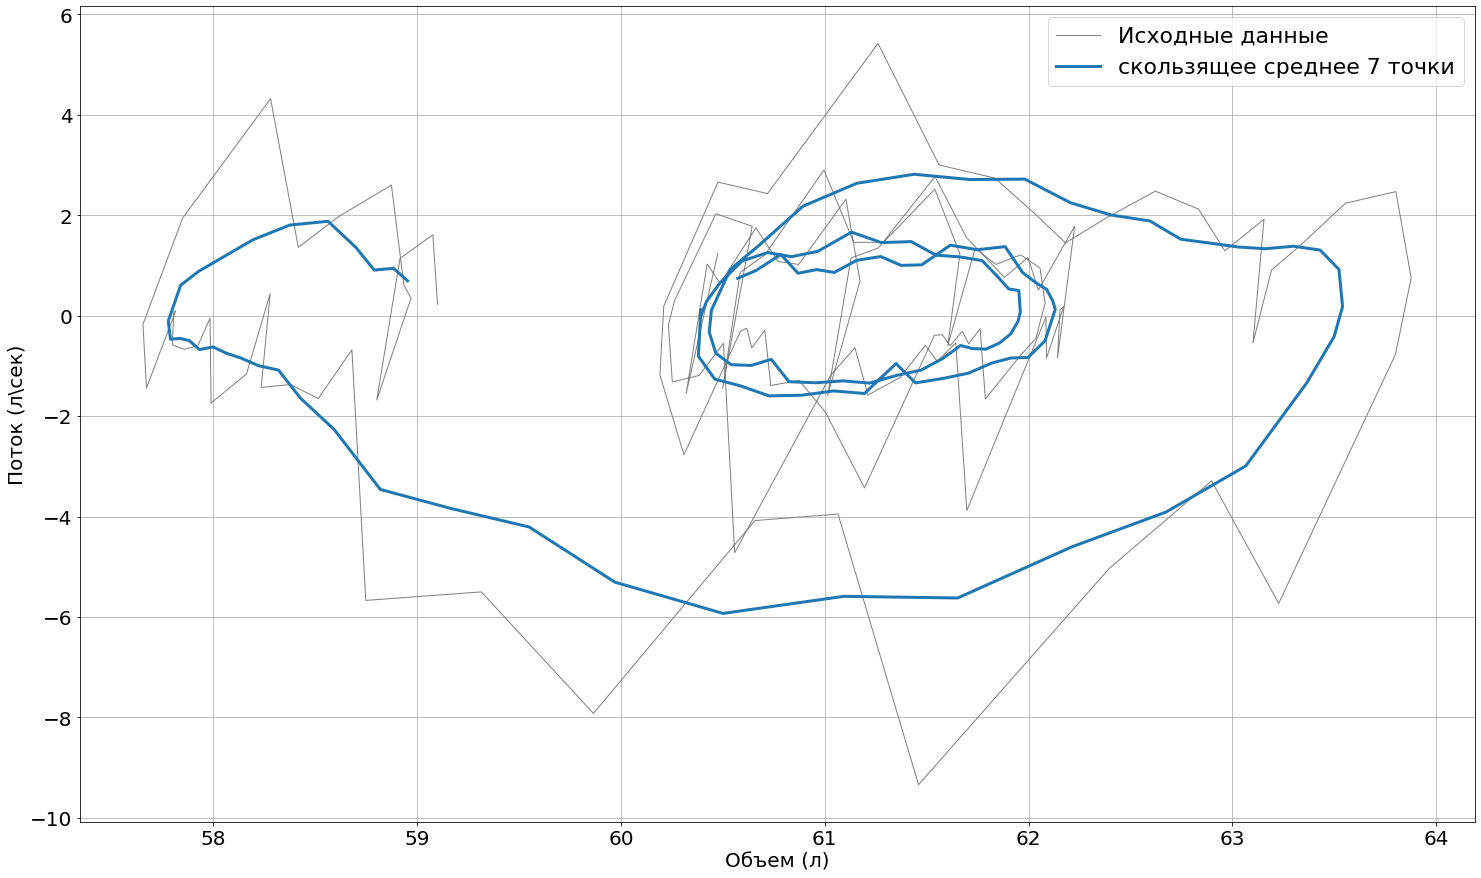

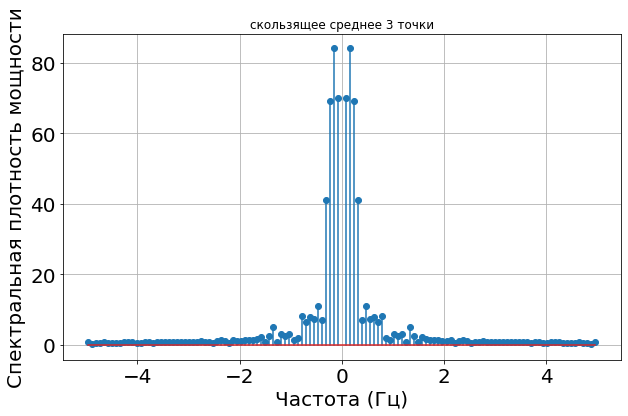

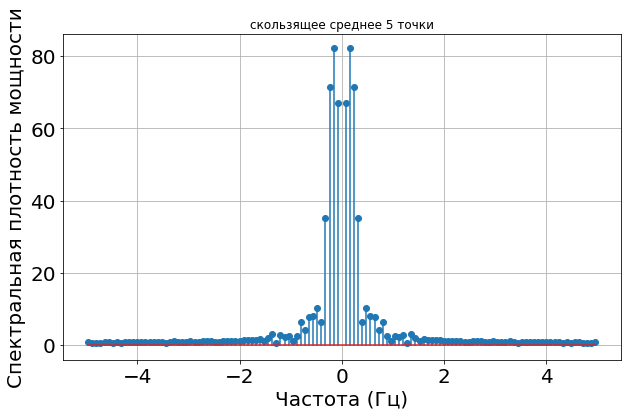

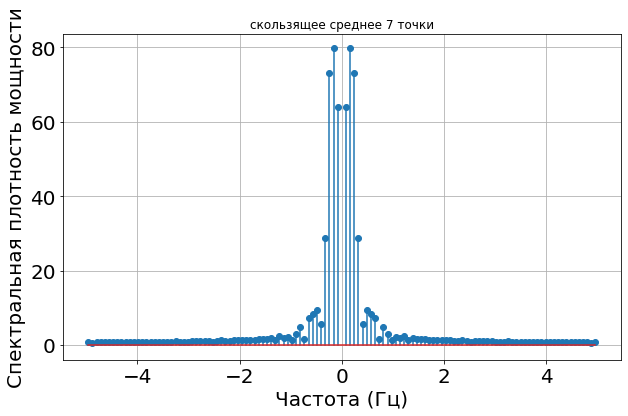

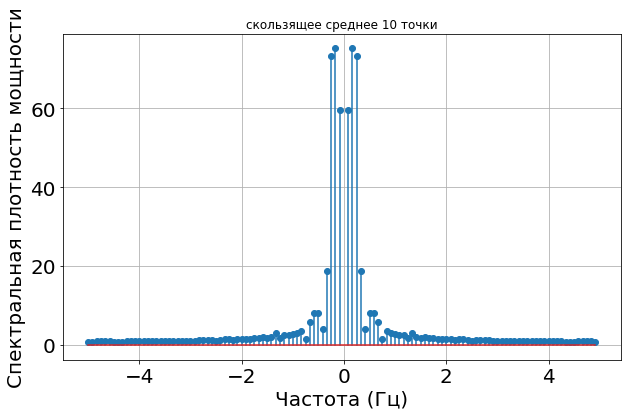

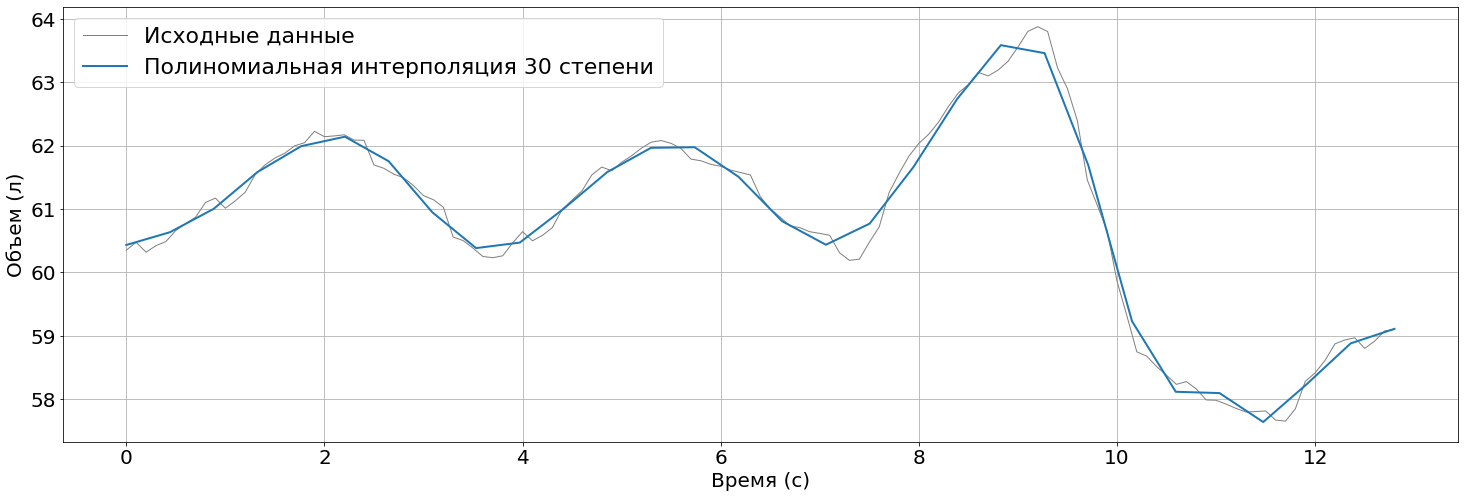

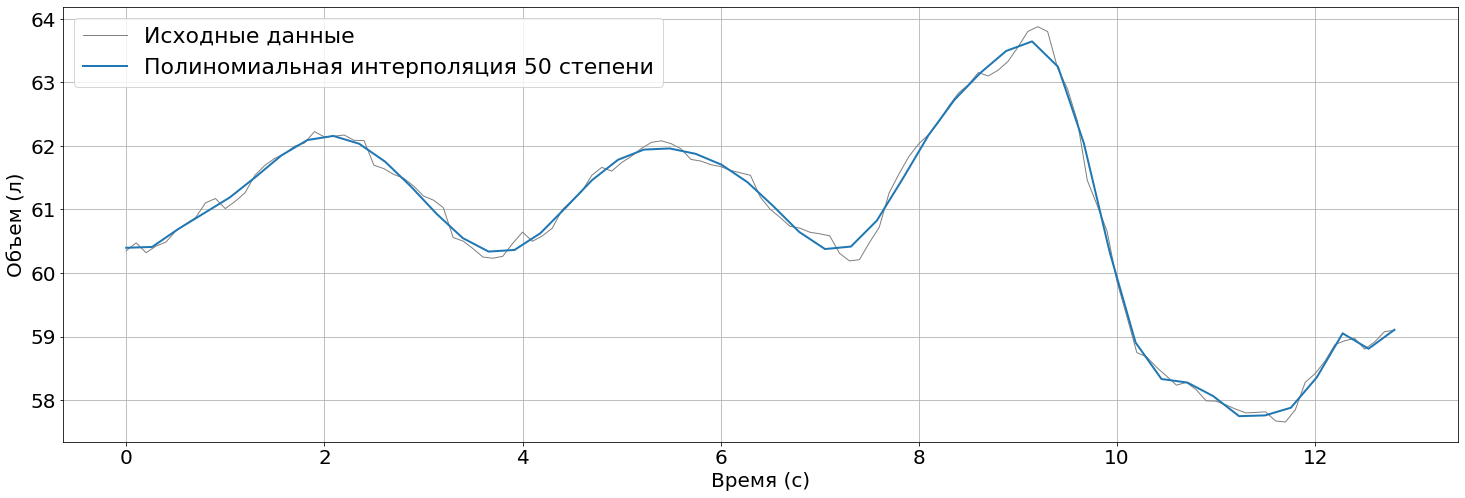

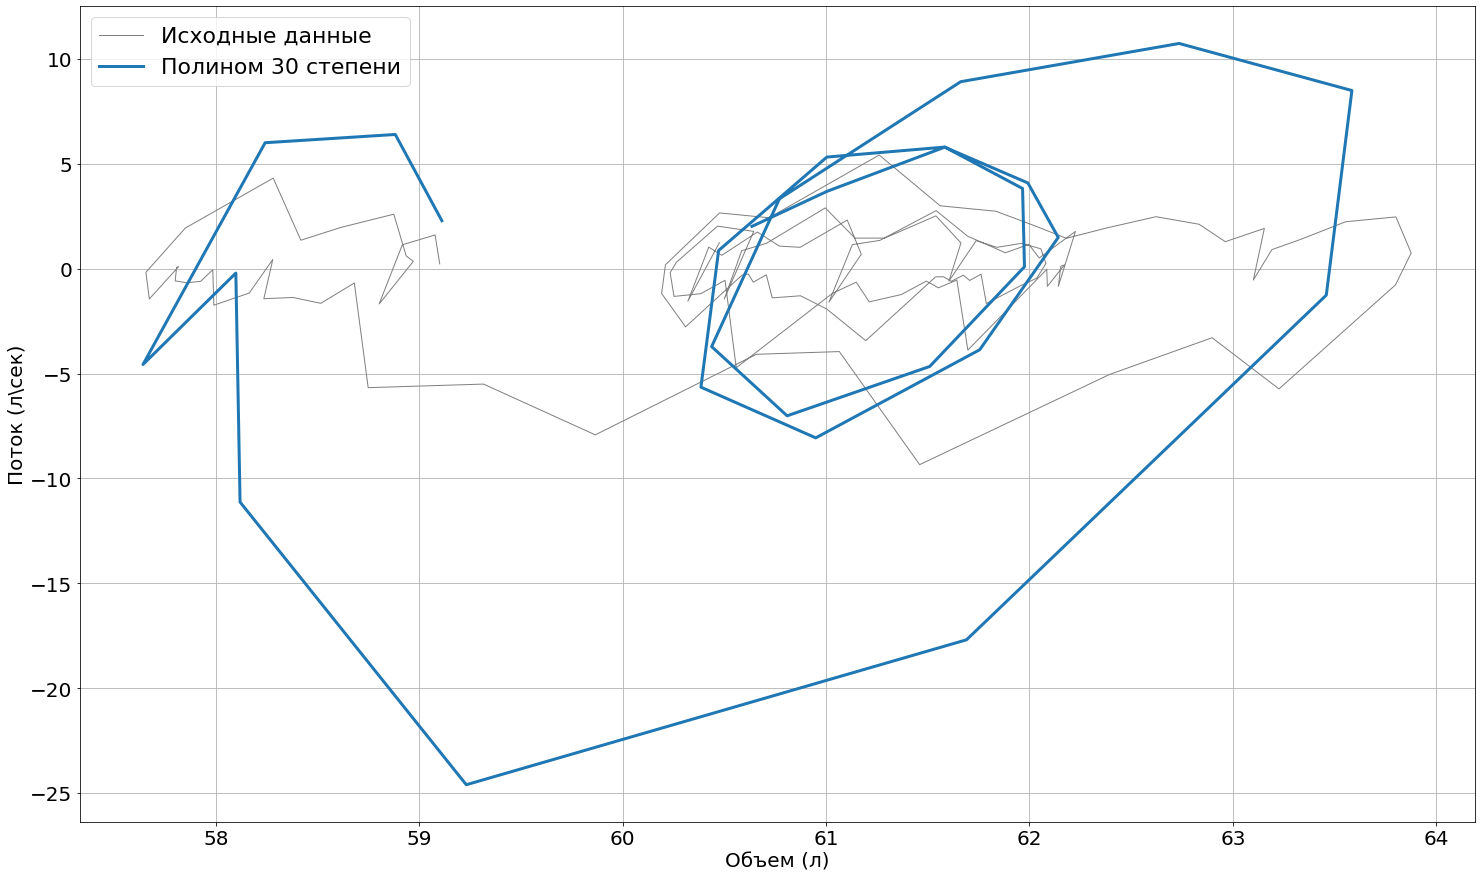

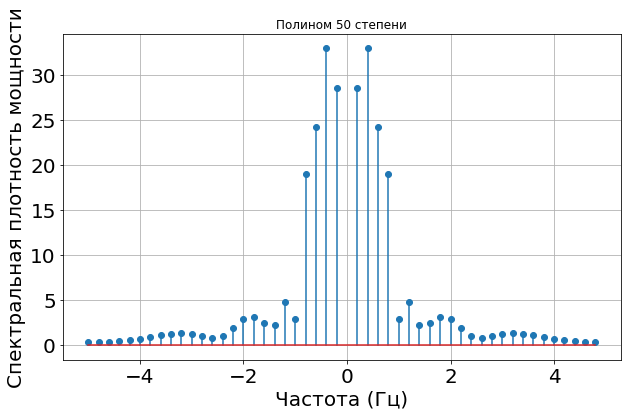

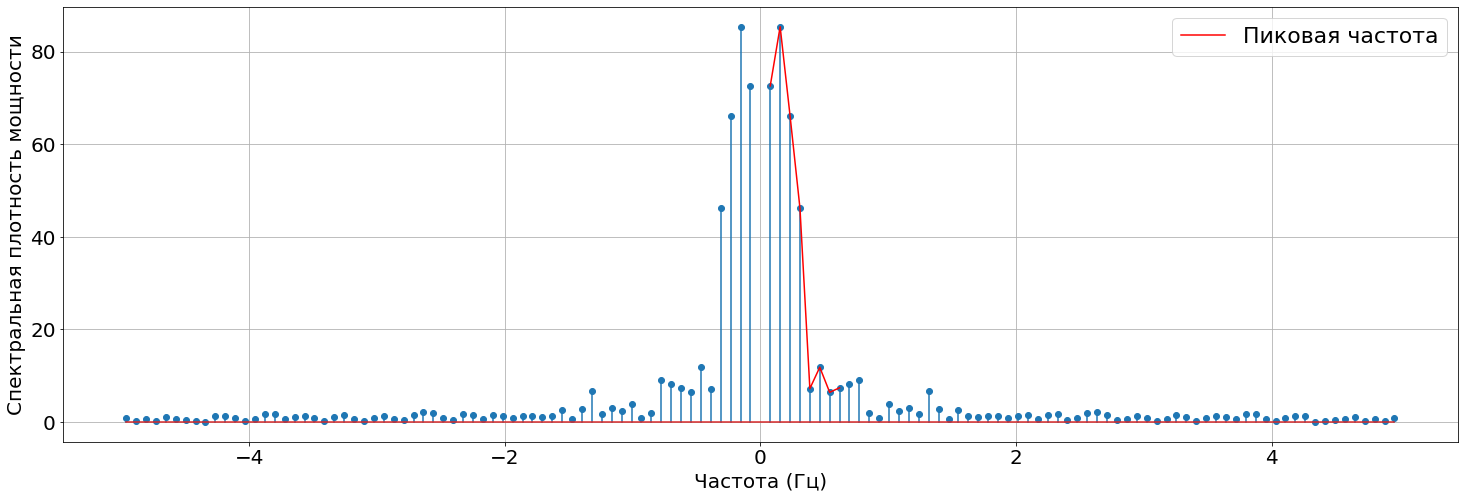

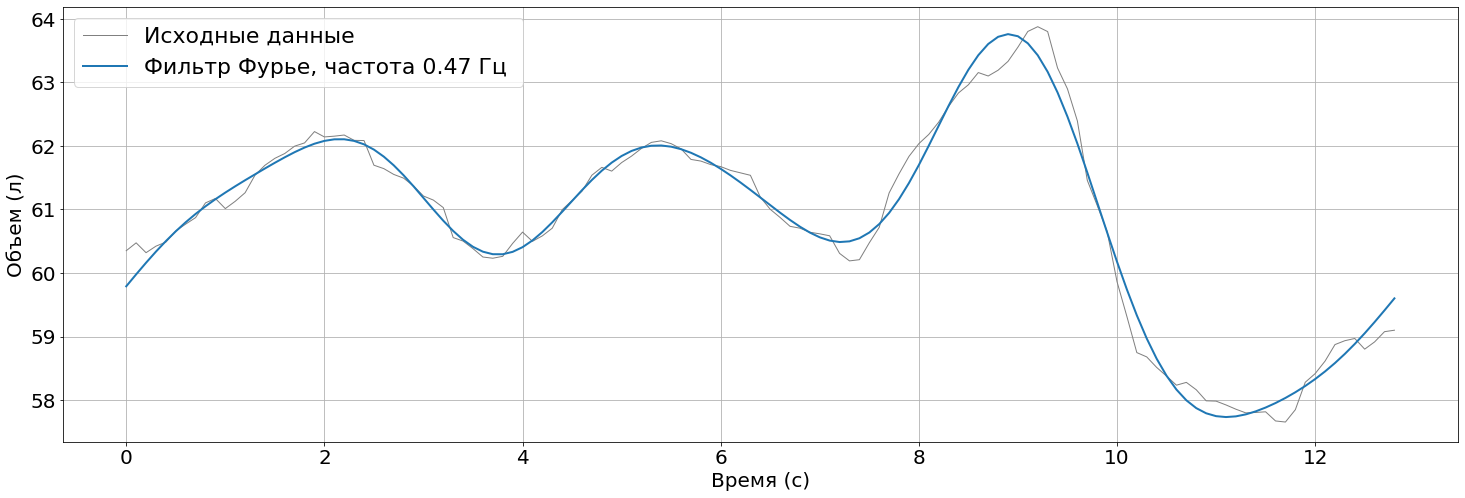

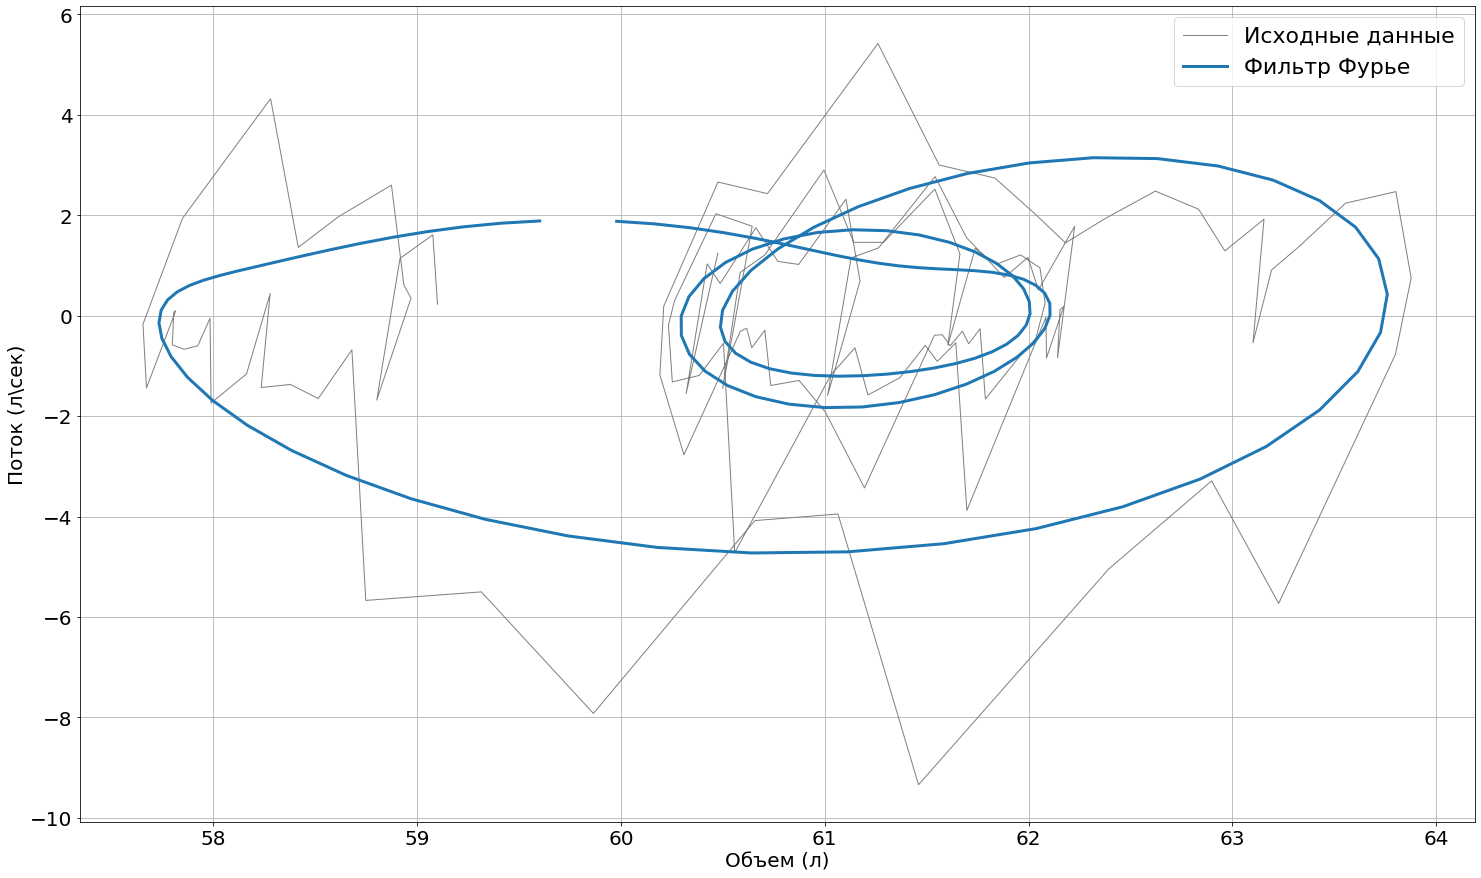

In [18]:
#пациент 1
y,x=Data_Preprocessing(df.patient_1)
plot_requency_power(y,'')
sma3=SMA(x,y,3)
sma5=SMA(x,y,5)
sma7=SMA(x,y,7)
sma10=SMA(x,y,10)
#LOOPA(sma3,'скользящее среднее 3 точки')
#LOOPA(sma5,'скользящее среднее 5 точки')
LOOPA(sma7,'скользящее среднее 7 точки')
#LOOPA(sma10,'скользящее среднее 10 точки')
plot_requency_power(sma3.dropna(),'скользящее среднее 3 точки')
plot_requency_power(sma5.dropna(),'скользящее среднее 5 точки')
plot_requency_power(sma7.dropna(),'скользящее среднее 7 точки')
plot_requency_power(sma10.dropna(),'скользящее среднее 10 точки')
#p10=polynom(y,x,10)
#polynom(y,x,20)
p30=polynom(y,x,30)
#polynom(y,x,40)

p50=polynom(y,x,50)
#LOOPA(p10,'Полином 10 степени')
LOOPA(p30,'Полином 30 степени')
#LOOPA(p50,'Полином 50 степени')

#plot_requency_power(p30,'Полином 30 степени')
plot_requency_power(p50,'Полином 50 степени')
freq=requency_power(y)
fu=Furier(y,x,freq)
LOOPA(fu,'Фильтр Фурье')

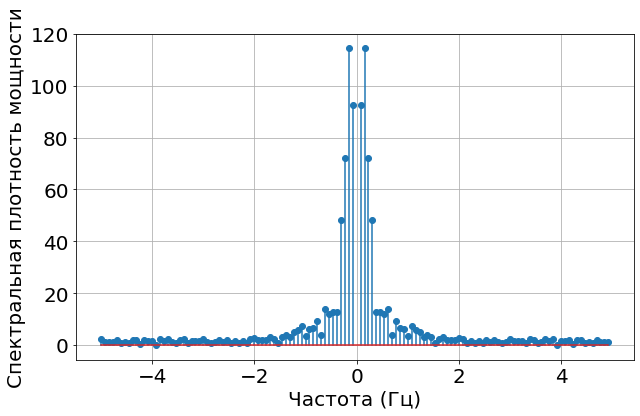

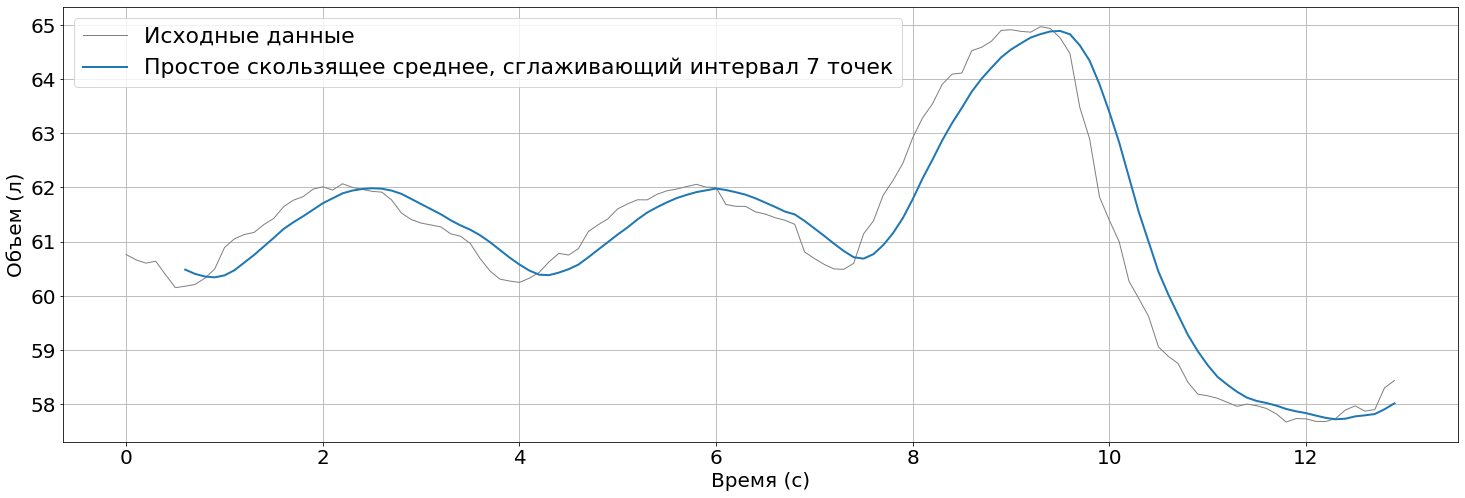

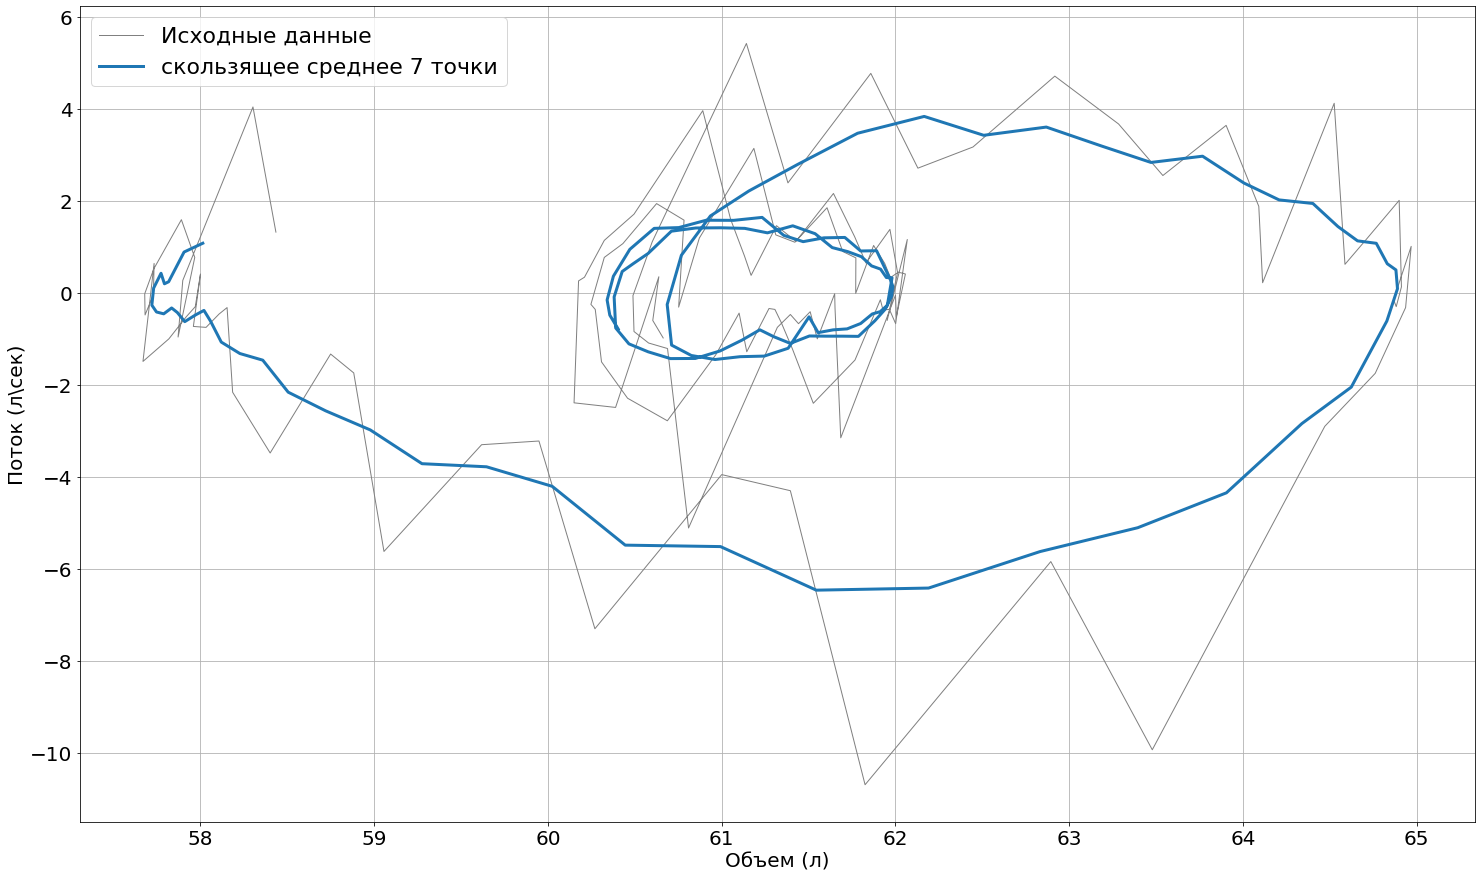

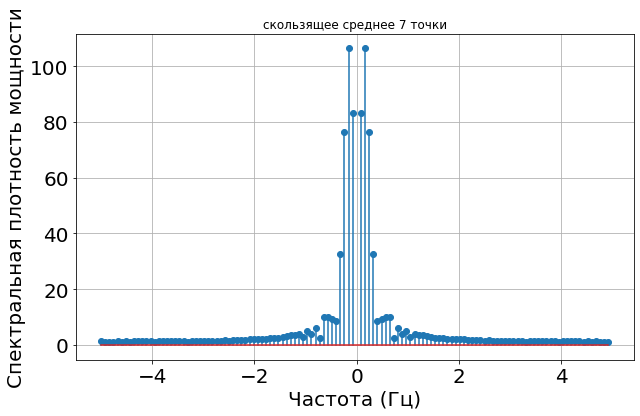

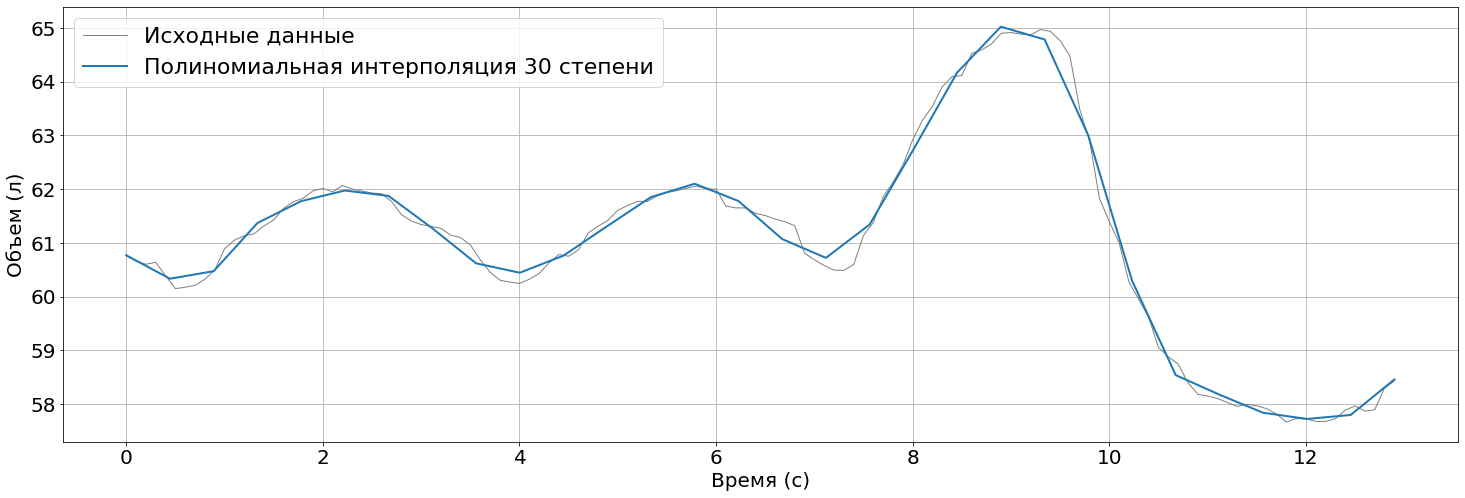

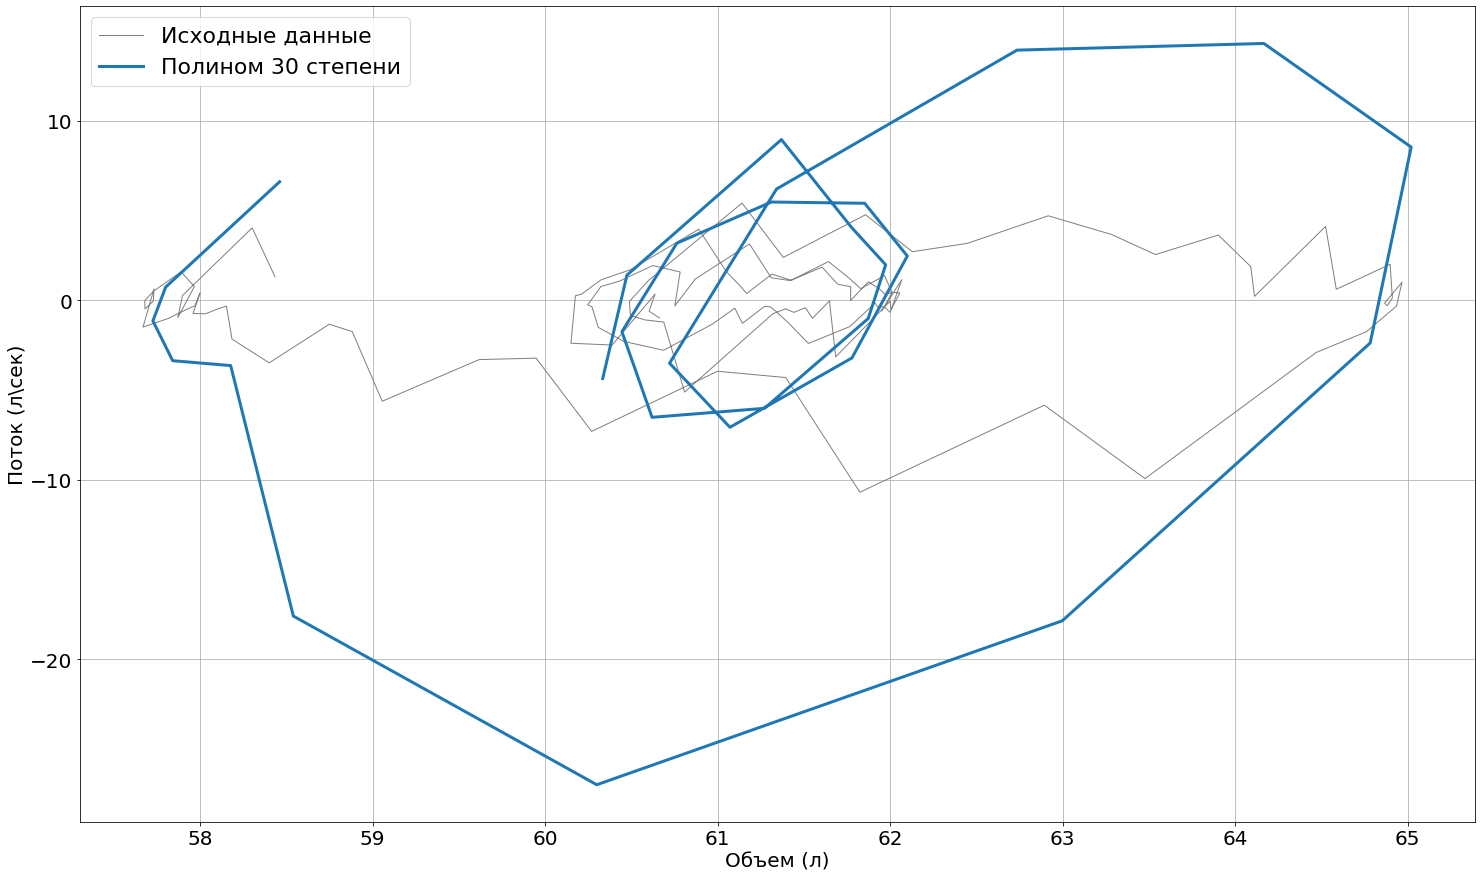

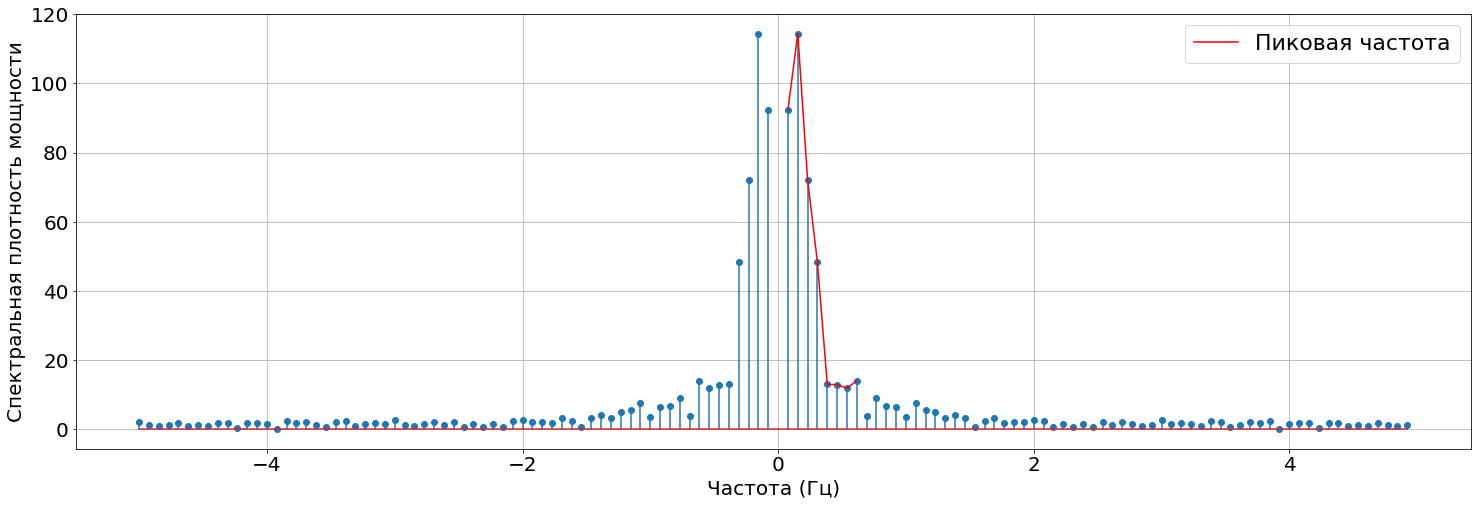

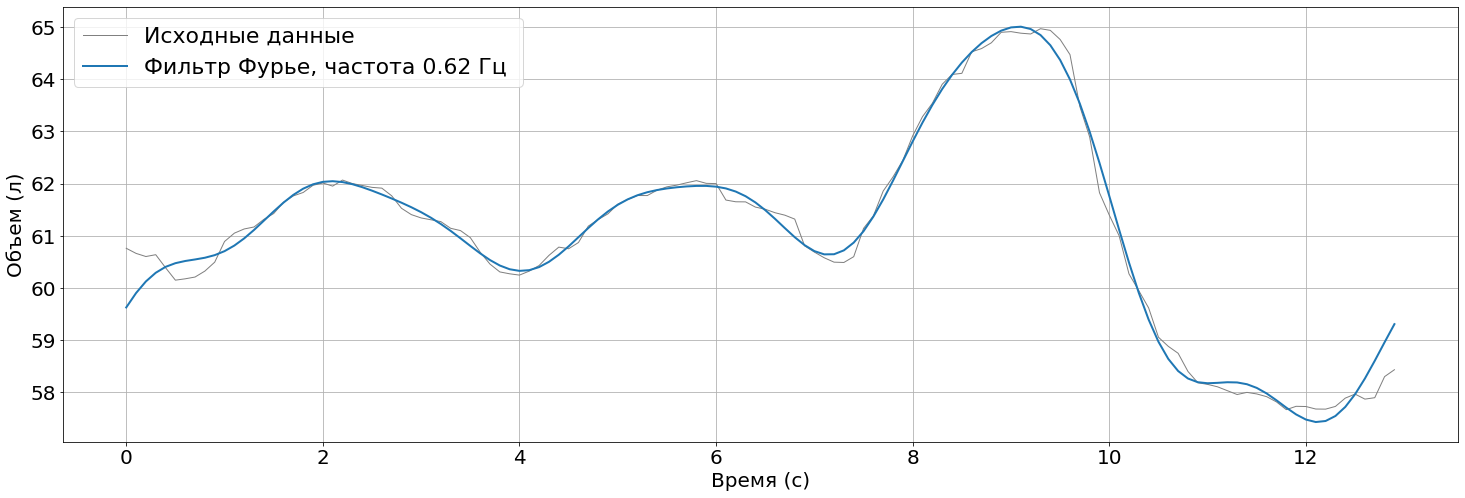

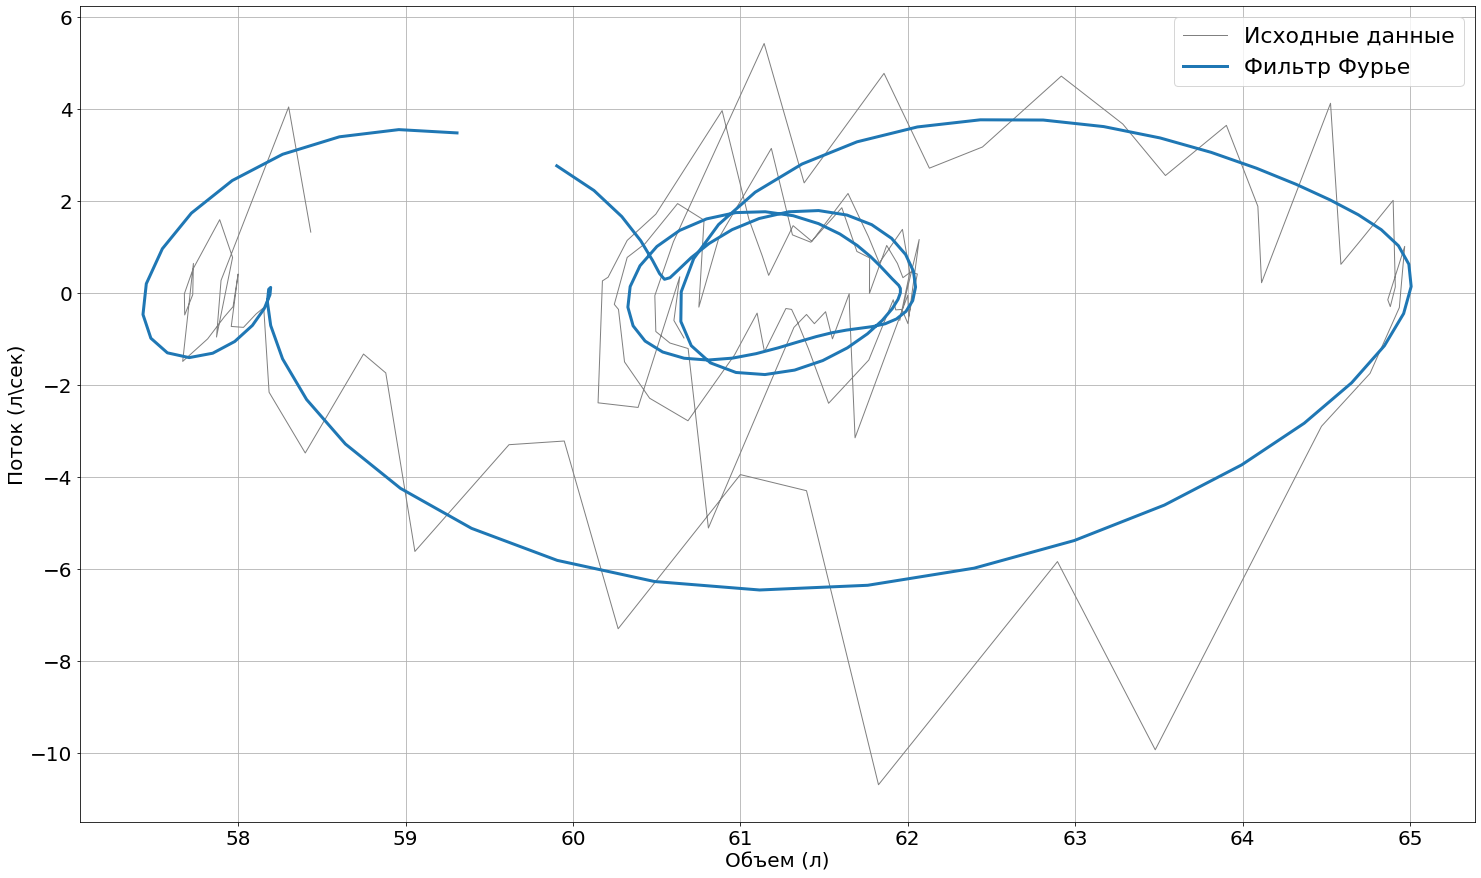

In [17]:
#пациент 2
y,x=Data_Preprocessing(df.patient_2)
plot_requency_power(y,'')
sma7=SMA(x,y,7)
LOOPA(sma7,'скользящее среднее 7 точки')
plot_requency_power(sma7.dropna(),'скользящее среднее 7 точки')
p30=polynom(y,x,30)
LOOPA(p30,'Полином 30 степени')

freq=requency_power(y)
fu=Furier(y,x,freq)
LOOPA(fu,'Фильтр Фурье')

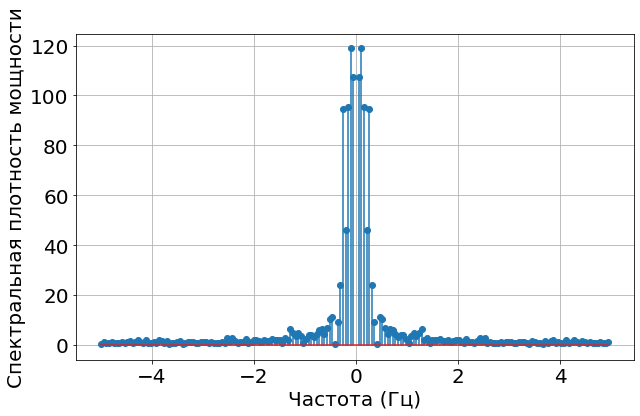

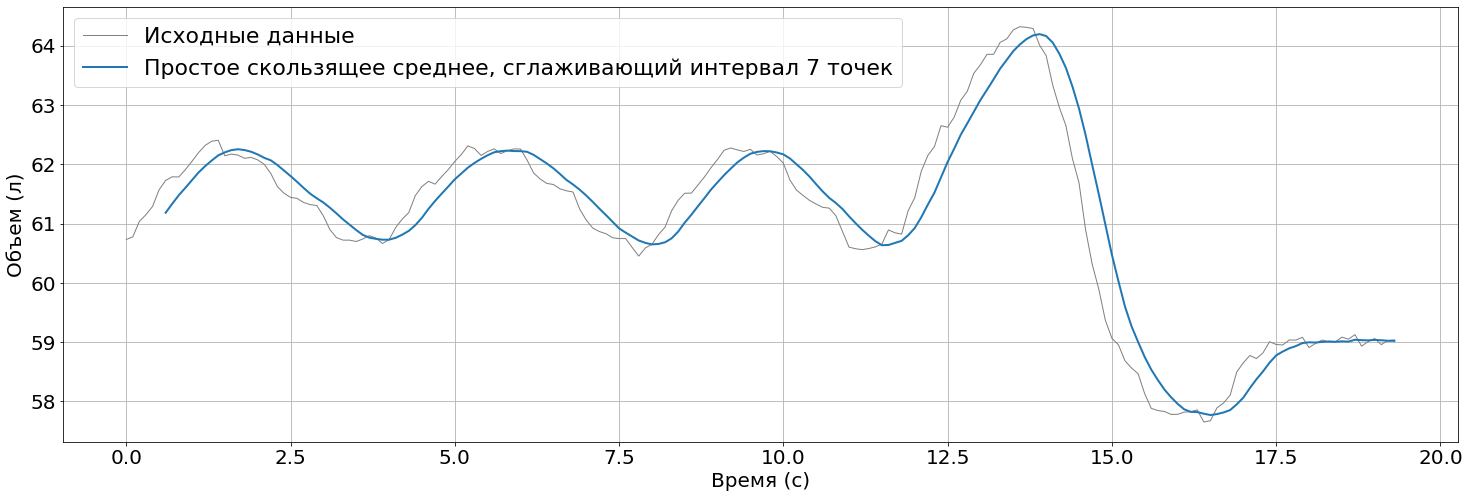

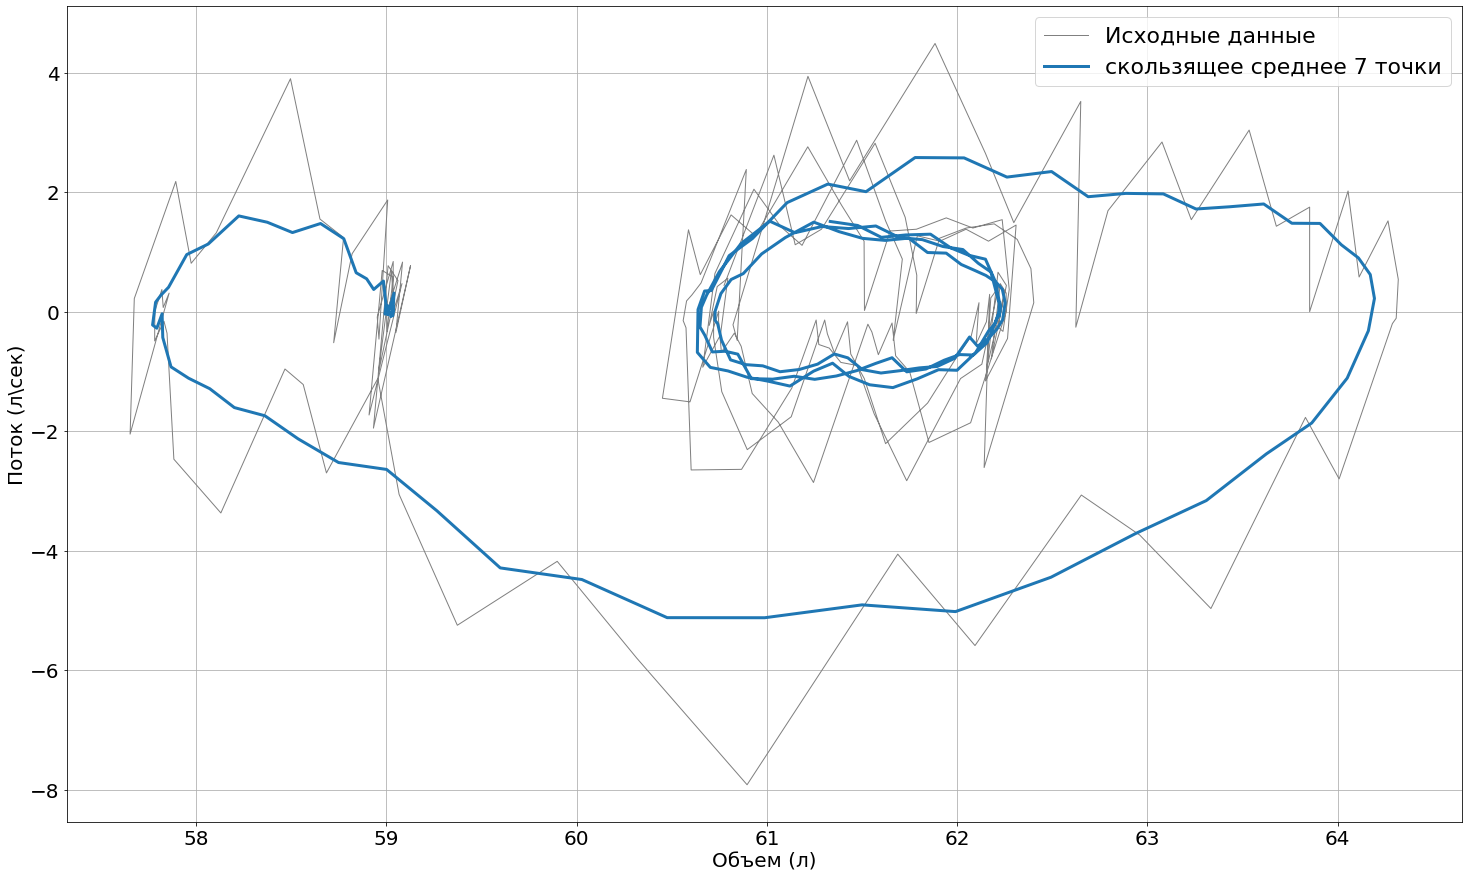

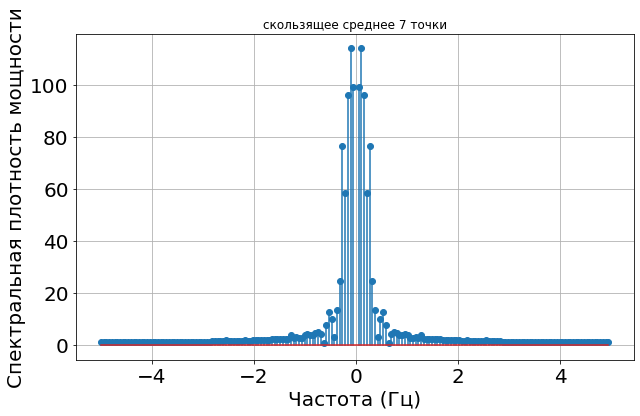

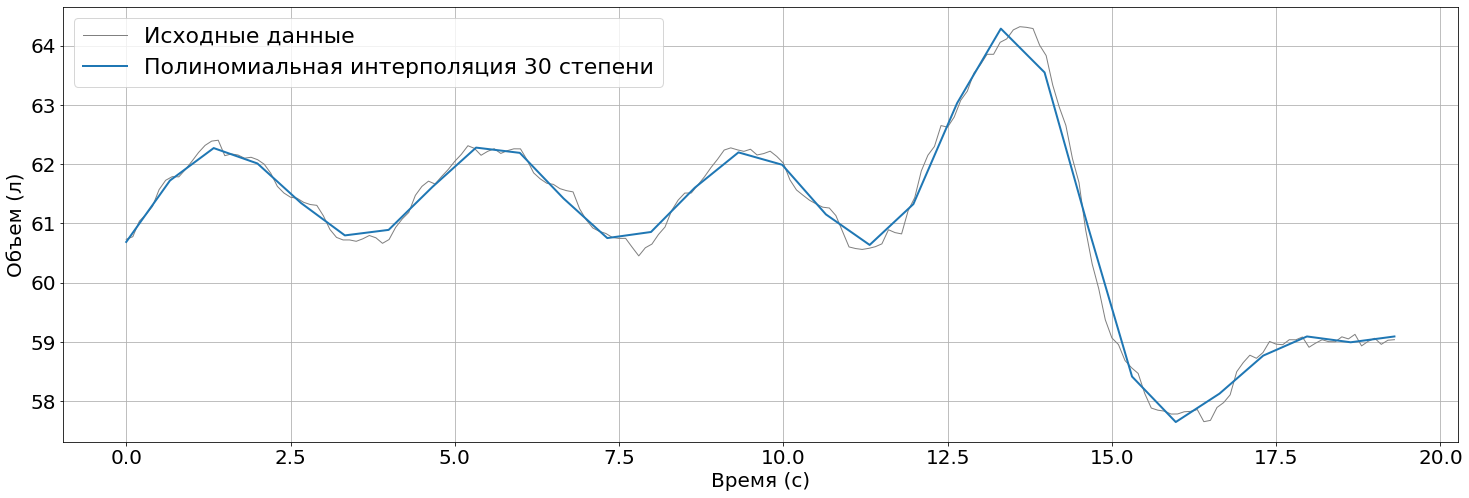

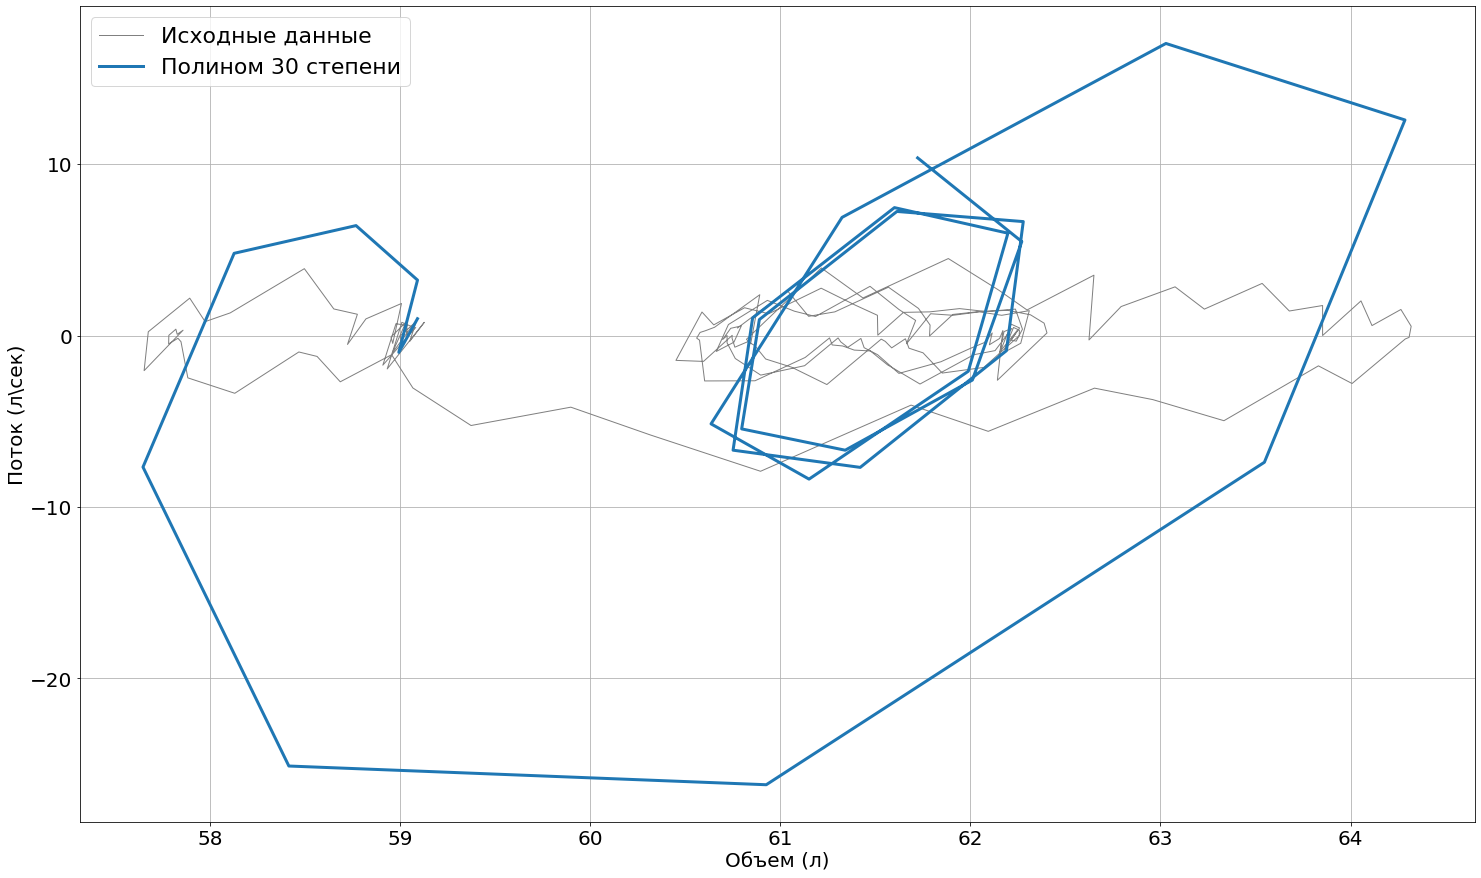

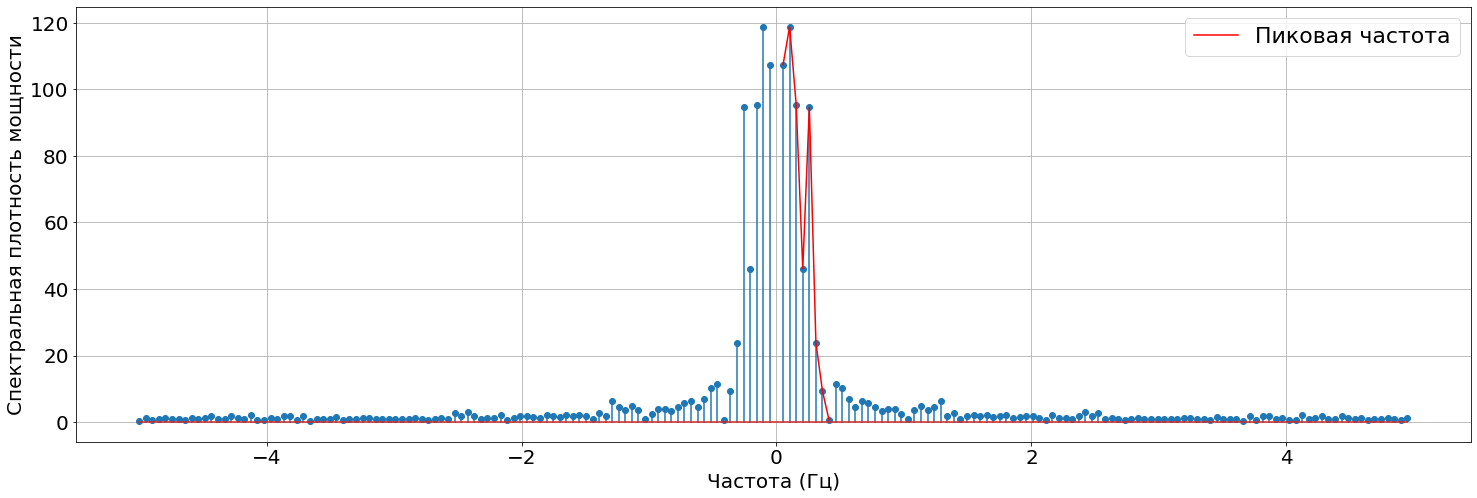

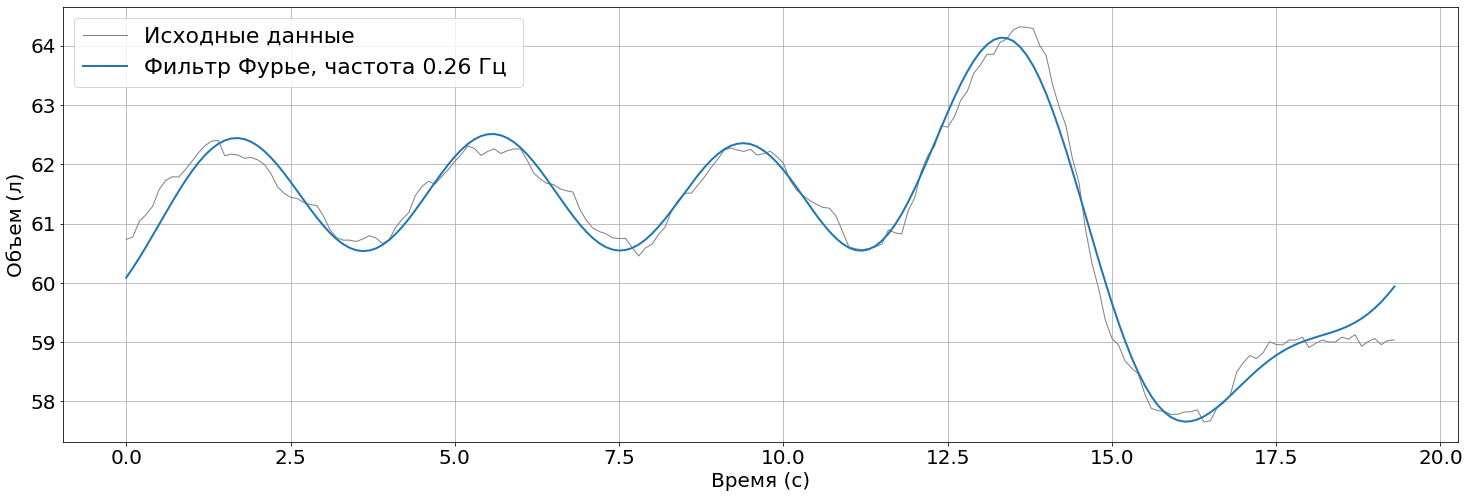

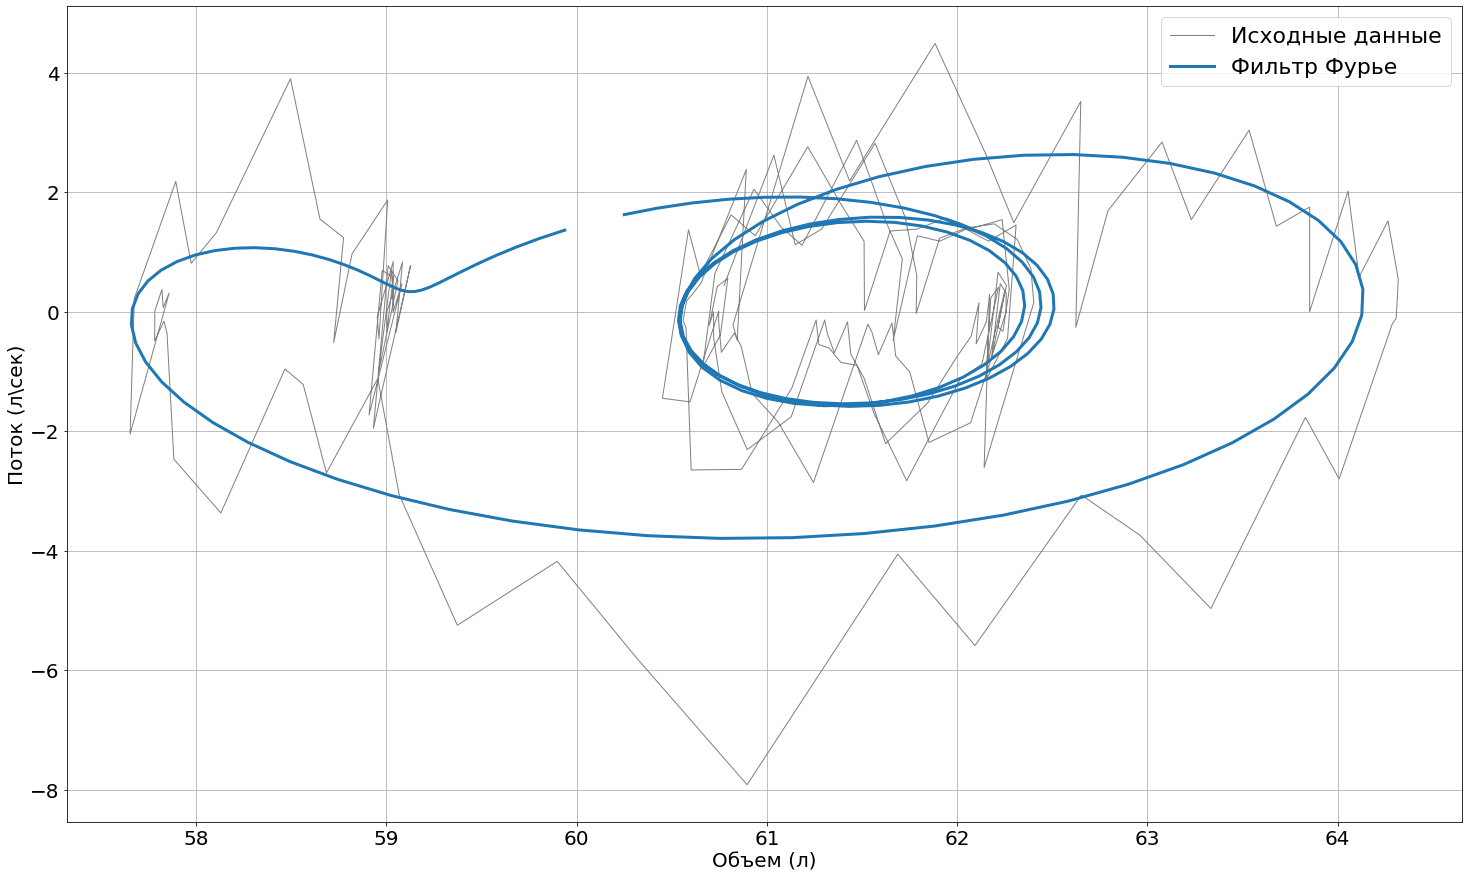

In [16]:
#пациент 3
y,x=Data_Preprocessing(df.patient_3)
plot_requency_power(y,'')

sma7=SMA(x,y,7)

LOOPA(sma7,'скользящее среднее 7 точки')

plot_requency_power(sma7.dropna(),'скользящее среднее 7 точки')
p30=polynom(y,x,30)
LOOPA(p30,'Полином 30 степени')

freq=requency_power(y)
fu=Furier(y,x,freq)
LOOPA(fu,'Фильтр Фурье')